# Рубежный контроль №1
## Тема: Технологии разведочного анализа и обработки данных.
### Вариант: 4

# Задача №1.

Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

# Дополнение для ИУ5-65Б

Для студентов группы ИУ5-65Б - для набора данных построить "парные диаграммы".

## Наборы данных:
https://www.kaggle.com/carlolepelaars/toy-dataset

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [6]:
# Загрузим выборку данных
data = pd.read_csv('TMO RK1 toy_dataset.csv', sep=",")

In [7]:
# размер набора данных
data.shape

(150000, 6)

In [8]:
# типы колонок
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

# Проверка на наличие пропусков в данных

In [9]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

## Пропусков в данных не обнаружено, следовательно производить удаление столбцов ии строк не требуется

In [10]:
# Первые 5 строк датасета
data.head()

Number    City Gender  Age   Income Illness
0       1  Dallas   Male   41  40367.0      No
1       2  Dallas   Male   54  45084.0      No
2       3  Dallas   Male   42  52483.0      No
3       4  Dallas   Male   40  40941.0      No
4       5  Dallas   Male   46  50289.0      No

# "Парные диаграммы" 
Построим диаграммы для данного датасета

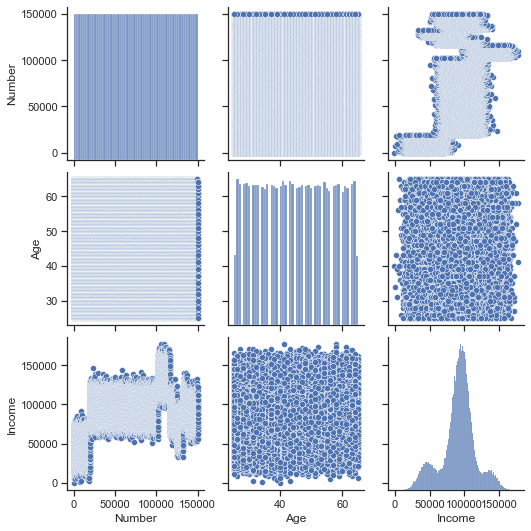

In [11]:
sns.pairplot(data)

### С помощью параметра "hue" построим диаграммы с группировкой по значениям признака Illness

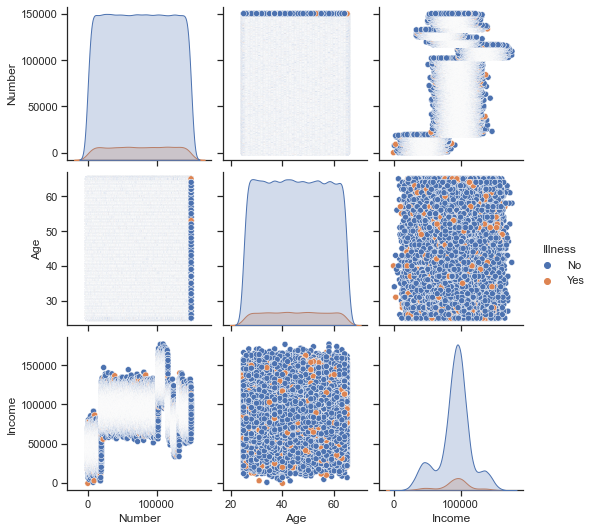

In [12]:
sns.pairplot(data, hue="Illness")

# Корреляционный анализ

<AxesSubplot:>

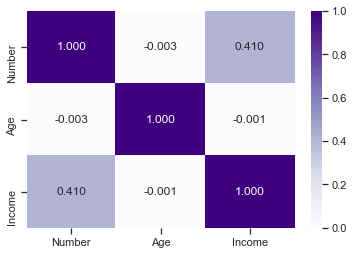

In [13]:
sns.heatmap(data.corr(), cmap='Purples', annot=True, fmt='.3f')

In [14]:
data.corr()

Number       Age    Income
Number  1.000000 -0.003448  0.410460
Age    -0.003448  1.000000 -0.001318
Income  0.410460 -0.001318  1.000000

# Выводы на основе корреляционной матрицы
- Параметр Income слабо коррелирует с параметром Number (0.41)
- Параметр Age отрицательно коррелирует с параметрами Number (-0.003) и Income (-0.001) (то есть со всеми параметрами данной модели они расходятся). Так как корреляция рассматривается по модулю значения, то мы можем сказать, что параметр Age очень слабо коррелирует со всеми остальными параметрами.
### Скорее всего не получится построить хорошую модель машинного обучения, так как между всеми параметрами корреляция очень слабая